# <center>Практическое задание №3. Анализ данных с Pandas</center>
## <center>Практическое задание. Анализ данных пассажиров "Титаника"</center>

**Заполните код в клетках (где написано "Ваш код здесь") и ответьте на вопросы в [веб-форме](https://goo.gl/SbRcpW).**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



%matplotlib inline

**Считаем данные из файла в память в виде объекта Pandas.DataFrame**

In [2]:
df = pd.read_csv("csv_data/titanic_train.csv", index_col="PassengerId")

**Данные представлены в виде таблицы. Посмотрим на первые 5 строк:**

In [3]:
df.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Для примера отберем пассажиров, которые сели в Cherbourg (Embarked=C) и заплатили более 200 у.е. за билет (fare > 200).**

In [5]:
df[(df["Embarked"] == "C") & (df.Fare > 200)].head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C


**Можно отсортировать этих людей по убыванию платы за билет.**

In [6]:
df[(df["Embarked"] == "C") & (df["Fare"] > 200)].sort_values(
    by="Fare", ascending=False
).head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C


**Пример создания признака**

In [7]:
def age_category(age):
    """
    < 30 -> 1
    >= 30, <55 -> 2
    >= 55 -> 3
    """
    if age < 30:
        return 1
    elif age < 55:
        return 2
    else:
        return 3

In [8]:
age_categories = [age_category(age) for age in df.Age]

In [9]:
df["Age_category"] = age_categories

**Другой способ – через `apply`.**

In [10]:
df["Age_category"] = df["Age"].apply(age_category)

**1. Сколько мужчин / женщин находилось на борту?**
- 412 мужчин и 479 женщин
- 314 мужчин и 577 женщин
- 479 мужчин и 412 женщин
- 577 мужчин и 314 женщин

In [11]:
df["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

**2. Выведите распределение переменной `Pclass` (социально-экономический статус) и это же распределение, только для мужчин / женщин по отдельности. Сколько было мужчин 2-го класса?**
- 104
- 108
- 112
- 125

In [12]:
# Распределение Pclass для всех
df["Pclass"].value_counts()

# Распределение Pclass для мужчин
df[df["Sex"] == "male"]["Pclass"].value_counts()

# Распределение Pclass для женщин
df[df["Sex"] == "female"]["Pclass"].value_counts()


3    144
1     94
2     76
Name: Pclass, dtype: int64

**3. Каковы медиана и стандартное отклонение платежей (`Fare`)? Округлите до 2 десятичных знаков.**
- Медиана – 14.45, стандартное отклонение – 49.69
- Медиана – 15.1, стандартное отклонение – 12.15
- Медиана – 13.15, стандартное отклонение – 35.3
- Медиана – 17.43, стандартное отклонение – 39.1

In [13]:
# Рассчитаем медиану и стандартное отклонение стоимости билетов
fare_median = round(df['Fare'].median(), 2)
fare_std = round(df['Fare'].std(), 2)

fare_median, fare_std


(14.45, 49.69)

**4. Правда ли, что люди моложе 30 лет выживали чаще, чем люди старше 60 лет? Каковы доли выживших в обеих группах?**
- 22.7% среди молодых и 40.6% среди старых
- 40.6% среди молодых и 22.7% среди старых
- 35.3% среди молодых и 27.4% среди старых
- 27.4% среди молодых и 35.3% среди старых

In [14]:
# Люди моложе 30 лет
young_survival_rate = df[df['Age'] < 30]['Survived'].mean() * 100

# Люди старше 60 лет
old_survival_rate = df[df['Age'] > 60]['Survived'].mean() * 100

young_survival_rate, old_survival_rate


(40.625, 22.727272727272727)

**5. Правда ли, что женщины выживали чаще мужчин? Каковы доли выживших в обеих группах?**
- 30.2% среди мужчин и 46.2% среди женщин
- 35.7% среди мужчин и 74.2% среди женщин
- 21.1% среди мужчин и 46.2% среди женщин
- 18.9% среди мужчин и 74.2% среди женщин

In [15]:
# Доля выживших мужчин
male_survival_rate = df[df['Sex'] == 'male']['Survived'].mean() * 100

# Доля выживших женщин
female_survival_rate = df[df['Sex'] == 'female']['Survived'].mean() * 100

male_survival_rate, female_survival_rate


(18.890814558058924, 74.20382165605095)

**6. Найдите самое популярное имя среди пассажиров Титаника мужского пола?**
- Charles
- Thomas
- William
- John

In [16]:
import re

def extract_first_name(full_name):
    # Извлекаем часть имени после титула (например, "Mr.", "Dr.")
    match = re.search(r'\b(?:Mr|Mrs|Miss|Master|Dr|Rev)\. ([A-Za-z]+)', full_name)
    if match:
        return match.group(1)
    return None

# Применяем функцию только для мужчин
male_names = df[df['Sex'] == 'male']['Name'].apply(extract_first_name)

# Находим самое популярное имя
popular_name = male_names.value_counts().idxmax()
popular_name


'William'

**7. Сравните графически распределение стоимости билетов и возраста у спасенных и у погибших. Средний возраст погибших выше, верно?**
- Да 
- Нет

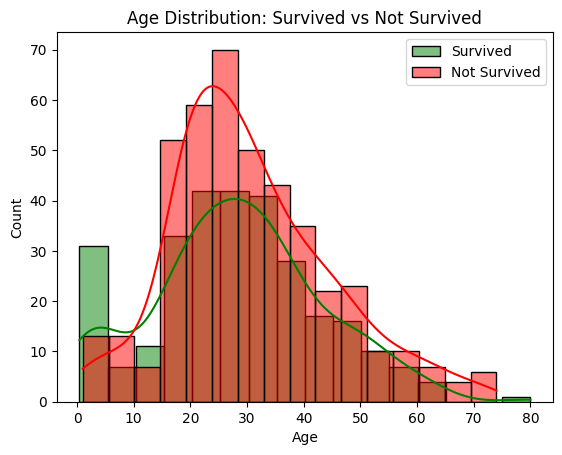

(28.343689655172415, 30.62617924528302)

In [17]:
# Графическое распределение возраста
sns.histplot(df[df['Survived'] == 1]['Age'], kde=True, color='green', label='Survived')
sns.histplot(df[df['Survived'] == 0]['Age'], kde=True, color='red', label='Not Survived')
plt.legend()
plt.title('Age Distribution: Survived vs Not Survived')
plt.show()

# Проверим средний возраст погибших и выживших
average_age_survived = df[df['Survived'] == 1]['Age'].mean()
average_age_not_survived = df[df['Survived'] == 0]['Age'].mean()

average_age_survived, average_age_not_survived


**8. Как отличается средний возраст мужчин / женщин в зависимости от класса обслуживания? Выберите верные утверждения:**
- В среднем мужчины 1-го класса старше 40 лет
- В среднем женщины 1-го класса старше 40 лет
- Мужчины всех классов в среднем старше женщин того же класса
- В среднем люди в 1 классе старше, чем во 2-ом, а те старше представителей 3-го класса

In [18]:
# Средний возраст мужчин и женщин по классам
average_age_by_class_and_sex = df.groupby(['Pclass', 'Sex'])['Age'].mean()
average_age_by_class_and_sex


Pclass  Sex   
1       female    34.611765
        male      41.281386
2       female    28.722973
        male      30.740707
3       female    21.750000
        male      26.507589
Name: Age, dtype: float64